In [ ]:
from graphxai.datasets import ShapeGGen
import matplotlib.pyplot as plt

100%|██████████| 45/45 [00:00<00:00, 79.81it/s]


Jumlah node: 137
Jumlah edge: 384
Jumlah kelas: 2


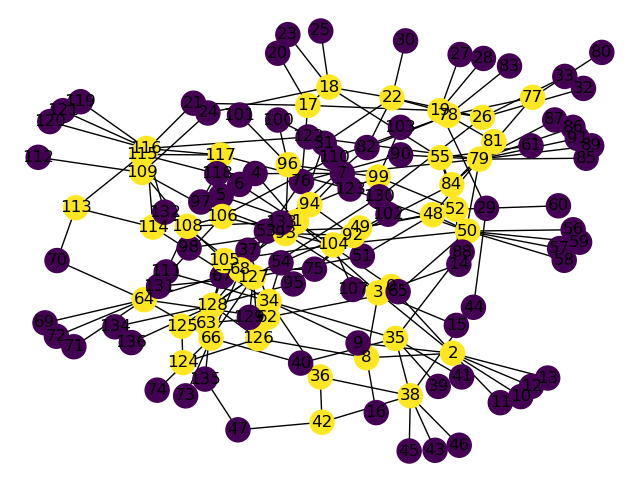

Total jumlah house-shaped motif dalam graf: 20


[{0: 0, 2: 1, 5: 2, 1: 3, 8: 4},
 {1: 0, 5: 1, 2: 2, 0: 3, 8: 4},
 {14: 0, 16: 1, 17: 2, 15: 3, 19: 4},
 {15: 0, 17: 1, 16: 2, 14: 3, 19: 4},
 {92: 0, 95: 1, 93: 2, 91: 3, 100: 4},
 {47: 0, 50: 1, 48: 2, 46: 3, 55: 4},
 {83: 0, 85: 1, 84: 2, 82: 3, 86: 4},
 {30: 0, 32: 1, 34: 2, 31: 3, 41: 4},
 {31: 0, 34: 1, 32: 2, 30: 3, 41: 4},
 {58: 0, 60: 1, 61: 2, 59: 3, 62: 4},
 {70: 0, 73: 1, 71: 2, 69: 3, 79: 4},
 {46: 0, 48: 1, 50: 2, 47: 3, 55: 4},
 {59: 0, 61: 1, 60: 2, 58: 3, 62: 4},
 {82: 0, 84: 1, 85: 2, 83: 3, 86: 4},
 {69: 0, 71: 1, 73: 2, 70: 3, 79: 4},
 {91: 0, 93: 1, 95: 2, 92: 3, 100: 4},
 {101: 0, 103: 1, 107: 2, 102: 3, 109: 4},
 {102: 0, 107: 1, 103: 2, 101: 3, 109: 4},
 {119: 0, 121: 1, 124: 2, 120: 3, 125: 4},
 {120: 0, 124: 1, 121: 2, 119: 3, 125: 4}]

In [9]:
# Membuat dataset dengan motif house-shaped - SG-Base
dataset = ShapeGGen(S='house', Ns=1200, p=0.006, ns=11, K=2, 
                    nf=11, ni=4, sf=0.6, cf=2, φ=0.5, η=1, L=3)

# Menampilkan informasi dataset
print(f"Jumlah node: {dataset.graph.x.shape[0]}")
print(f"Jumlah edge: {dataset.graph.edge_index.shape[1]}")
print(f"Jumlah kelas: {dataset.graph.y.max().item() + 1}")

# Visualisasi dataset
fig, ax = plt.subplots(figsize=(8, 6))
dataset.visualize(shape_label=True, ax=ax, show=True)

import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher

# Definisi house-shaped motif
house_motif = nx.Graph()
house_motif.add_edges_from([(0,1), (1,2), (2,3), (3,0), (1,4), (2,4)]) # Struktur motif rumah

def find_house_motif_fast(G):
    """
    Mencari house-shaped motif dengan Graph Matching untuk meningkatkan kecepatan.
    Args:
        G (networkx.Graph): Graf NetworkX yang akan dianalisis.
    Returns:
        int: Jumlah house-shaped motif yang ditemukan.
    """
    matcher = GraphMatcher(G, house_motif)
    motifs = list(matcher.subgraph_isomorphisms_iter())

    print(f"Total jumlah house-shaped motif dalam graf: {len(motifs)}")
    return motifs

# Jalankan pencarian motif dengan metode lebih cepat
find_house_motif_fast(G_nx)

100%|██████████| 45/45 [00:00<00:00, 66.95it/s]


Jumlah node: 143
Jumlah edge: 396
Jumlah kelas: 2


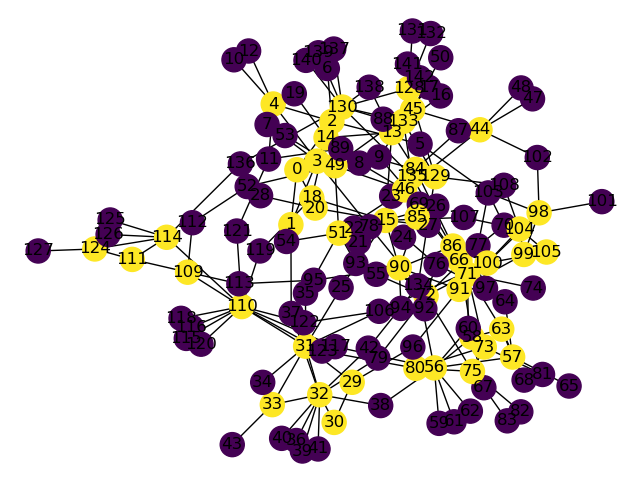

Total jumlah triangle motif dalam graf: 10


10

In [5]:
# Membuat dataset dengan motif house-shaped - SG-SmallEx
dataset = ShapeGGen(S='triangle', Ns=1200, p=0.006, ns=12, K=2, 
                    nf=11, ni=4, sf=0.5, cf=2, φ=0.5, η=1, L=3)

# Menampilkan informasi dataset
print(f"Jumlah node: {dataset.graph.x.shape[0]}")
print(f"Jumlah edge: {dataset.graph.edge_index.shape[1]}")
print(f"Jumlah kelas: {dataset.graph.y.max().item() + 1}")

# Visualisasi dataset
fig, ax = plt.subplots(figsize=(8, 6))
dataset.visualize(shape_label=True, ax=ax, show=True)

import networkx as nx

# Mengubah dataset menjadi graf NetworkX
G_nx = nx.Graph()
edge_list = dataset.graph.edge_index.numpy().T  # Konversi edge_index dari tensor ke numpy
G_nx.add_edges_from(edge_list)

# Menghitung jumlah triangle motif
def count_triangles(G):
    triangles = nx.triangles(G)  # Menghitung jumlah triangle motif per node
    total_triangles = sum(triangles.values()) // 3  # Dibagi 3 karena dihitung per node
    
    print(f"Total jumlah triangle motif dalam graf: {total_triangles}")
    return total_triangles

count_triangles(G_nx)